In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import StratifiedKFold, ParameterGrid, KFold
from load_data import load_train_data, load_test_data

In [2]:
train = load_train_data()

In [3]:
train.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


In [4]:
train.shape

(1503424, 18)

In [5]:
train.duplicated(subset='image_top_1').value_counts()

True     1500361
False       3063
dtype: int64

In [6]:
train.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503424 entries, 0 to 1503423
Data columns (total 18 columns):
item_id                 1503424 non-null object
user_id                 1503424 non-null object
region                  1503424 non-null object
city                    1503424 non-null object
parent_category_name    1503424 non-null object
category_name           1503424 non-null object
param_1                 1441848 non-null object
param_2                 848882 non-null object
param_3                 640859 non-null object
title                   1503424 non-null object
description             1387148 non-null object
price                   1418062 non-null float64
item_seq_number         1503424 non-null int64
activation_date         1503424 non-null object
user_type               1503424 non-null object
image                   1390836 non-null object
image_top_1             1390836 non-null float64
deal_probability        1503424 non-null float64
dtypes: float64(3), int

In [7]:
train['image_top_1'].value_counts()

2219.0    18739
1002.0    18646
2918.0    15407
2264.0    14517
2218.0    14415
42.0      12328
47.0      11144
82.0      10939
84.0      10652
1118.0    10214
96.0       8400
2262.0     8394
2220.0     8095
523.0      7483
2217.0     7443
91.0       7322
88.0       7204
44.0       7056
1055.0     6968
2932.0     6886
2370.0     6795
52.0       6679
97.0       6447
2221.0     6047
1108.0     5923
95.0       5806
1431.0     5768
53.0       5625
93.0       5575
501.0      5227
          ...  
1595.0        4
203.0         4
332.0         4
612.0         3
2163.0        3
255.0         3
2672.0        3
1695.0        3
2659.0        3
506.0         3
2567.0        3
2684.0        3
2211.0        3
2312.0        3
2257.0        3
2682.0        3
207.0         2
616.0         2
200.0         2
144.0         2
2689.0        2
2087.0        2
2212.0        2
2664.0        2
2680.0        1
2663.0        1
2685.0        1
1748.0        1
258.0         1
2250.0        1
Name: image_top_1, Lengt

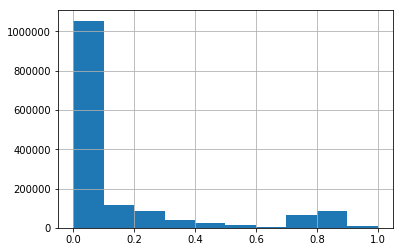

In [8]:
train['deal_probability'].hist()

In [9]:
vars_with_missing = []
for f in train.columns:
    missings = train[f].isnull().sum()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable param_1 has 61576 records (4.10%) with missing values
Variable param_2 has 654542 records (43.54%) with missing values
Variable param_3 has 862565 records (57.37%) with missing values
Variable description has 116276 records (7.73%) with missing values
Variable price has 85362 records (5.68%) with missing values
Variable image has 112588 records (7.49%) with missing values
Variable image_top_1 has 112588 records (7.49%) with missing values
In total, there are 7 variables with missing values


- 列削除：param_2，param_3（欠損値多い）
- 補間
    - 平均：price
    - 最頻値：image_top_1⇒計算に時間がかかるため列削除
- 保留：param_1, description, image

In [10]:
import sys

print("{}{: >25}{}{: >10}{}".format('|','Variable Name','|','Memory','|'))
print(" ------------------------------------ ")
for var_name in dir():
    if not var_name.startswith("_"):
        print("{}{: >25}{}{: >10}{}".format('|',var_name,'|',sys.getsizeof(eval(var_name)),'|'))

|            Variable Name|    Memory|
 ------------------------------------ 
|                       In|       192|
|                    KFold|      1056|
|                      Out|       240|
|            ParameterGrid|      1056|
|          StratifiedKFold|      1056|
|                     exit|        56|
|                        f|        65|
|              get_ipython|        64|
|           load_test_data|       136|
|          load_train_data|       136|
|                 missings|        32|
|            missings_perc|        32|
|                       np|        80|
|                       pd|        80|
|                      plt|        80|
|                     quit|        56|
|                      sys|        80|
|                    train|2476512616|
|        vars_with_missing|       128|


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
description = train['description'].fillna(' ')
vec = TfidfVectorizer(max_features=100)
tfidf = vec.fit_transform(description)

In [34]:
tfidf = np.array(tfidf.todense(), dtype=np.float16)

In [35]:
for i in range(100):
    train['tfidf_' + str(i)] = tfidf[:, i]

In [37]:
train.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,...,tfidf_90,tfidf_91,tfidf_92,tfidf_93,tfidf_94,tfidf_95,tfidf_96,tfidf_97,tfidf_98,tfidf_99
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),...,0.000000,0.0,0.0,0.0,0.000000,0.831055,0.0,0.0,0.0,0.0
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,...,0.486572,0.0,0.0,0.0,0.471924,0.000000,0.0,0.0,0.0,0.0
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [38]:
type(train)

pandas.core.frame.DataFrame